# Data Analysis Examples

## 1.USA.gov Data from Bitly

In [36]:
from numpy.random import randn
import numpy as np
np.random.seed(123)
import os
import matplotlib.pyplot as plt
import pandas as pd
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4)
pd.options.display.max_rows = 20

In [11]:
import json
with open('example.txt') as fs:
    records = [json.loads(line) for line in fs]

In [31]:
# records[0].keys()
# records[0]['tz']
time_zones = [record['tz'] for record in records if 'tz' in record ]
time_zones[:3]

['America/New_York', 'America/Denver', 'America/New_York']

In [55]:
df = pd.DataFrame(records)
tz_counts = df['tz'].value_counts()
tz_counts
# indexer = tz_counts.argsort()
# df['tz'].iloc[indexer[-10:]]

America/New_York                  1251
                                   521
America/Chicago                    400
America/Los_Angeles                382
America/Denver                     191
                                  ... 
Europe/Skopje                        1
America/Argentina/Buenos_Aires       1
Australia/Queensland                 1
America/Montevideo                   1
America/Argentina/Cordoba            1
Name: tz, Length: 97, dtype: int64

In [65]:
clean_tz = df['tz'].fillna('Missing')
clean_tz[clean_tz=='']='Unkown'
clean_tz[clean_tz=='Missing']#
tz_counts = clean_tz.value_counts()
tz_counts

America/New_York        1251
Unkown                   521
America/Chicago          400
America/Los_Angeles      382
America/Denver           191
                        ... 
America/Monterrey          1
Asia/Yekaterinburg         1
Australia/Queensland       1
America/Montevideo         1
Asia/Kuching               1
Name: tz, Length: 98, dtype: int64

In [66]:
clean_tz

0          America/New_York
1            America/Denver
2          America/New_York
3         America/Sao_Paulo
4          America/New_York
               ...         
3555       America/New_York
3556        America/Chicago
3557         America/Denver
3558    America/Los_Angeles
3559       America/New_York
Name: tz, Length: 3560, dtype: object

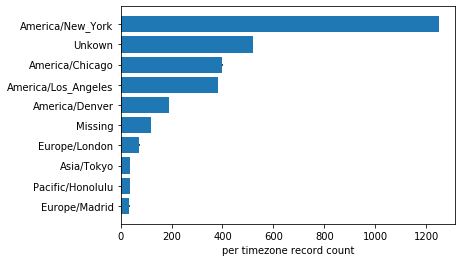

In [74]:
fig, ax = plt.subplots()

# Example data
people =tuple(tz_counts.index[:10])

y_pos = np.arange(len(people))
performance = tz_counts.values[:10]
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('per timezone record count')
# ax.set_title('How fast do you want to go today?')

plt.show()